# Homework 3 Problem 6

AMath 584, Autumn Quarter 2016.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
data_file = '../homeworks/hw3/co2.txt'
data = loadtxt(data_file, skiprows=90)
t = data[:,2]   # First column is index 0
y = data[:,3]

# filter out the bad data:
good = y>0   # indexes of good data
t = t[good]  # this portion of array
y = y[good]

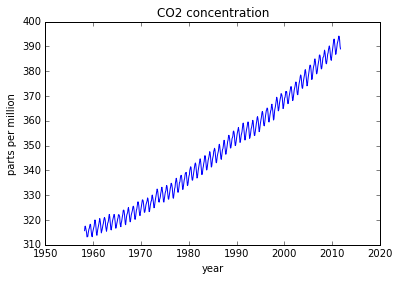

In [16]:
plot(t,y)
title('CO2 concentration')
xlabel('year')
ylabel('parts per million')


### Convenience function to create matrix $A$ from given $t$ and basis functions

In [13]:
def make_A(t, basis_functions):
    """
    Construct an m by n matrix A from the sample times 
    t (an array of length m) and 
    basis_vectors (a list of n functions).
    """
    n = len(basis_functions) 
    m = len(t)
    A = empty((m,n), dtype=float)  # initialize array
    for j in range(n):
        phi_j = basis_functions[j]
        A[:,j] = phi_j(t)  # set jth column of A
    return A


### Lambda functions

In Python you can define a function like this:

In [5]:
def phi(t):
    return cos(2*pi*(t-1985))

# test it:
phi(1985.5)

-1.0

But if it's such a simple function you can also define it this way, as a "lambda function".

In [6]:
phi = lambda t: cos(2*pi*(t-1985))

# test it:
phi(1985.5)

-1.0

**Note:** Because of this `lambda` is a key word in Python, so don't try to use it for a variable name (in particular use something else for eigenvalues!).

### Problem 6(a)

Now we can easily define a list of the basis functions we want and form the matrix $A$:

In [7]:
basis_functions = [lambda t:cos(2*pi*(t-1985)), \
                   lambda t:sin(2*pi*(t-1985)), \
                   lambda t:1, \
                   lambda t:t-1985]

A = make_A(t, basis_functions)
print "A has shape %i by %i" % A.shape

A has shape 636 by 4


### Solve the least squares problem:

Solve using the QR factorization.  For comparison, also solv ewith the `lstsq` function from numpy:

In [8]:
## Using lstsq <========================

lstsq_output = lstsq(A, y)
c = lstsq_output[0]  
print "Coefficients by lstsq: ",c

## Using qr <========================

Q,R = qr(A)
c = solve(R, dot(Q.T,y))
print "Coefficients using QR: ",c

Coefficients by lstsq:  [  -1.08548211    2.63010436  347.49982378    1.45916509]
Coefficients using QR:  [  -1.08548211    2.63010436  347.49982378    1.45916509]


Note that lstsq returns more than just the solution, which is the first output.  It also returns the sum of squares of the residual vector, the rank, and the singular values of $A$. 

In [9]:
lstsq_output

(array([  -1.08548211,    2.63010436,  347.49982378,    1.45916509]),
 array([ 4638.75061892]),
 4,
 array([ 388.68671863,   25.21911048,   17.85518204,   17.80798968]))

Sum of squares of resisuals is 4638.75


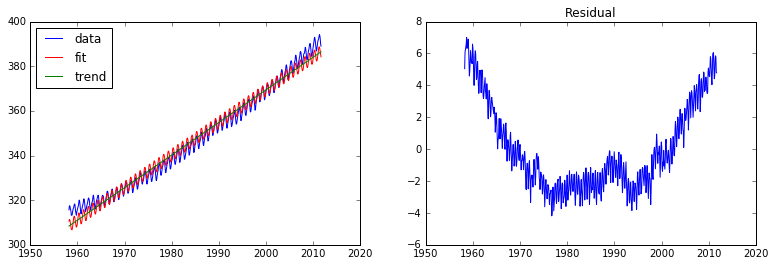

In [10]:
# Make fit and plot:

y_fit = dot(A,c)

figure(figsize=(13,4))
subplot(1,2,1)
plot(t,y,'b',label='data')
plot(t,y_fit,'r',label='fit')


subplot(1,2,2)
plot(t, y - y_fit)
title("Residual")
print "Sum of squares of resisuals is %g" % norm(y-y_fit,2)**2

# Remove oscillations and plot trend:
c2 = c.copy()
c2[0] = 0.
c2[1] = 0.
y_trend = dot(A,c2)
subplot(1,2,1)
plot(t, y_trend, 'g', label='trend')
legend(loc='upper left');

## Problem 6(b)

Repeat this with the additional quadratic basis function.

A has shape 636 by 5
Coefficients using QR:  [ -1.03139954e+00   2.61307265e+00   3.44664953e+02   1.45743828e+00
   1.19366196e-02]
Sum of squares of resisuals is 531.511


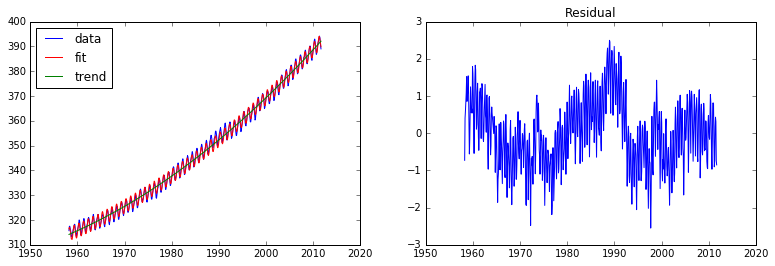

In [14]:

basis_functions = [lambda t:cos(2*pi*(t-1985)), \
                   lambda t:sin(2*pi*(t-1985)), \
                   lambda t:1, \
                   lambda t:t-1985, \
                   lambda t:(t-1985)**2]

A = make_A(t, basis_functions)
print "A has shape %i by %i" % A.shape

Q,R = qr(A)
c = solve(R, dot(Q.T,y))
print "Coefficients using QR: ",c

# Make fit and plot:

y_fit = dot(A,c)

figure(figsize=(13,4))
subplot(1,2,1)
plot(t,y,'b',label='data')
plot(t,y_fit,'r',label='fit')


subplot(1,2,2)
plot(t, y - y_fit)
title("Residual")
print "Sum of squares of resisuals is %g" % norm(y-y_fit,2)**2

# Remove oscillations and plot trend:
c2 = c.copy()
c2[0] = 0.
c2[1] = 0.
y_trend = dot(A,c2)
subplot(1,2,1)
plot(t, y_trend, 'g', label='trend')
legend(loc='upper left');

## Problem 6(c)

Evaluate the function $f(t) = \sum c_i \phi_i(t)$ over a longer time period and plot this extrapolation.  

Note that we can evaluate the function at an arbitrary set of points by defining a new matrix with columns consisting of the basis functions evaluated at the desired points and then multiplying this matrix by the coefficient vector found above.

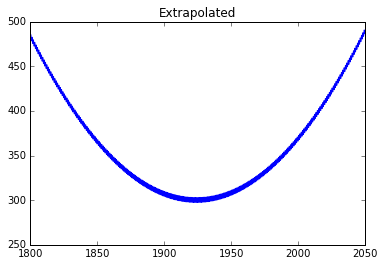

In [12]:
tt = linspace(1800,2050,10000)
AA = make_A(tt, basis_functions)
yy = dot(AA,c)
plot(tt,yy)
title('Extrapolated')

Note that there are bounded oscillations around a  quadratic trend due to our choice of basis functions.  This results in an extrapolation backward in time that shows the $CO_2$ concentration much higher than the present.  

Using this fit to extrapolate forward in time might give a good estimate over a few years, but is not a dependable way to predict the future!